In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
data_dir = r'C:\Users\Sheraz\Documents\pythontest\project_all_ml\fita\Datasets'

In [7]:
img_size = (224, 224)
batch_size = 11

In [3]:
class_map = {
    'Normal': 'Healthy',
    'Bacteria': 'Diseased',
    'Fungi': 'Diseased',
    'Nematodes': 'Diseased',
    'Virus': 'Diseased'
}

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 192 images belonging to 5 classes.


In [10]:
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 47 images belonging to 5 classes.


In [11]:
class_names = list(train_generator.class_indices.keys())
print("Class labels:", class_names)

Class labels: ['Bacteria', 'Fungi', 'Nematodes', 'Normal', 'Virus']


In [12]:
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=3,               
    restore_best_weights=True 
)


In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
18/18 [==============================] - 13s 674ms/step - loss: 1.8211 - accuracy: 0.1771 - val_loss: 1.5894 - val_accuracy: 0.2979
Epoch 2/50
18/18 [==============================] - 13s 709ms/step - loss: 1.5785 - accuracy: 0.2708 - val_loss: 1.5385 - val_accuracy: 0.2340
Epoch 3/50
18/18 [==============================] - 12s 668ms/step - loss: 1.4806 - accuracy: 0.3958 - val_loss: 1.3265 - val_accuracy: 0.5106
Epoch 4/50
18/18 [==============================] - 12s 679ms/step - loss: 1.2946 - accuracy: 0.4896 - val_loss: 1.2645 - val_accuracy: 0.5106
Epoch 5/50
18/18 [==============================] - 12s 652ms/step - loss: 1.0450 - accuracy: 0.6042 - val_loss: 1.0250 - val_accuracy: 0.5957
Epoch 6/50
18/18 [==============================] - 12s 650ms/step - loss: 0.9219 - accuracy: 0.6198 - val_loss: 0.8775 - val_accuracy: 0.7872
Epoch 7/50
18/18 [==============================] - 13s 721ms/step - loss: 1.0823 - accuracy: 0.5885 - val_loss: 0.9103 - val_accuracy: 0.7234

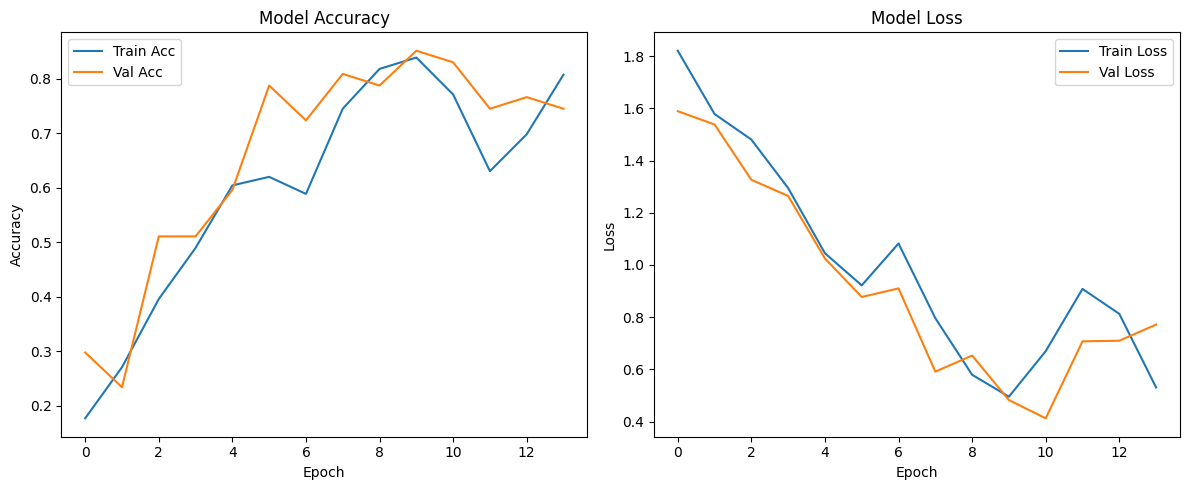

In [ ]:
# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)

    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()
    
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    is_diseased = predicted_class != 'Normal'

    print(f"Predicted class: {predicted_class}")
    print(f"Diseased? {'Yes' if is_diseased else 'No'}")


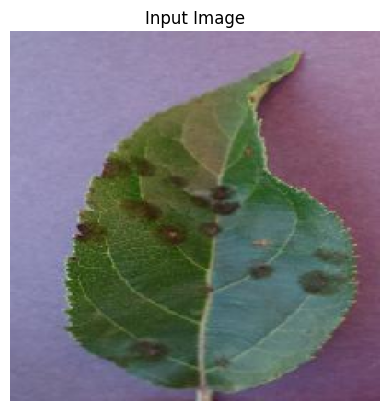

1/1 [==============================] - 0s 53ms/step
Predicted class: Bacteria
Diseased? Yes


In [24]:
predict_image(r"C:\Users\Sheraz\Documents\pythontest\project_all_ml\fita\Datasets\Bacteria\0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.JPG")

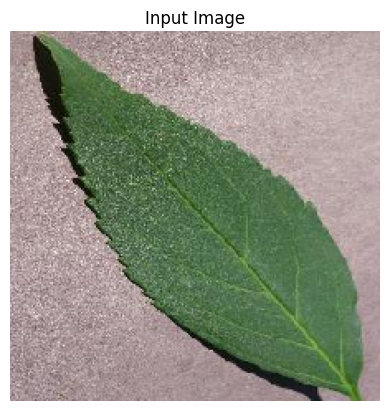

1/1 [==============================] - 0s 35ms/step
Predicted class: Normal
Diseased? No


In [25]:
predict_image(r"C:\Users\Sheraz\Documents\pythontest\project_all_ml\fita\Datasets\Normal\00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG")

In [26]:
model.save(r"C:\Users\Sheraz\Documents\pythontest\project_all_ml\fita\leaf_model.h5")


In [27]:
import pickle
with open(r"C:\Users\Sheraz\Documents\pythontest\project_all_ml\fita\class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)